# Clustering

In [27]:
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

Betrachten 3 verschiedene künstlich erstellte, zufällige Punktwolken:

1. `X, y = datasets.make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)`
2. $XT$  mit $T = \begin{bmatrix}0.6& -0.8\\ -0.4&0.8\end{bmatrix}$
3. `X, y = datasets.make_moons(n_samples=1000, noise=0.05, random_state=1)`

# Aufgabe 1: Daten Generieren & Visualisieren

Daten generieren und Visualisieren (z.B. mit `plt.scatter`)

## Make Blobs

In [28]:
X, y = datasets.make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)

print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


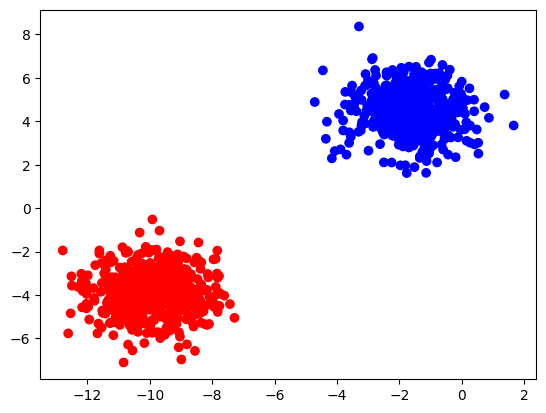

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.show()

## $X\cdot T$

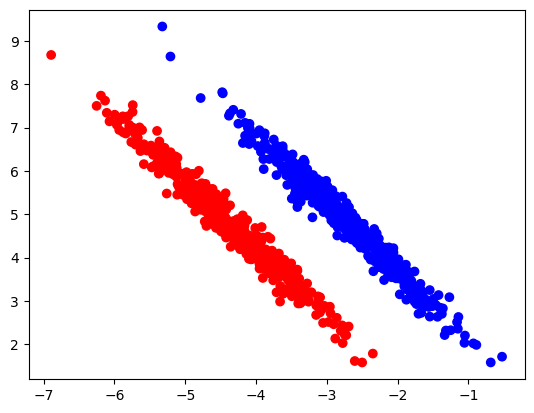

In [30]:
T = np.array([[0.6, -0.8], [-0.4, 0.8]])
XT = X @ T

plt.scatter(XT[:, 0], XT[:, 1], c=y, cmap='bwr')
plt.show()

## Make Moons

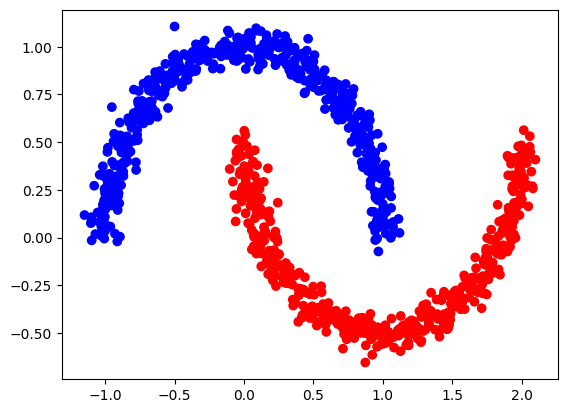

In [31]:
X2, y2 = datasets.make_moons(n_samples=1000, noise=0.05, random_state=1)

plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='bwr')
plt.show()

# Aufgabe 2: Clustering mit verschiedenen Algorithmen

## Naives K-Means

In [62]:
def naive_kmeans(X, K):
    mu = X[np.random.choice(X.shape[0], K, replace=False)]
    mu_idx = np.zeros(X.shape[0], dtype=np.int8)
    max_it = 100

    for k in range(max_it):
        s = [[] for _ in range(K)]
        for j in range(X.shape[0]):
            # k Distanzen zu den k Zentren
            dists = np.sum((X[j,:] - mu)**2, axis=1)
            
            # kleinste Distanz
            mu_idx[j] = int(np.argmin(dists))
            
            # Sortierung / Zuordnung Beobachtung x
            s[mu_idx[j]].append(X[j, :])
            
        mu_old = mu
        
        # Cluster-Mittelwerte
        mu = np.squeeze([np.mean(cluster, axis=0) for cluster in s])
        if np.equal(mu, mu_old).all():
                    break
    
    return mu

[[-9.96418821 -3.92559384]
 [-1.61635019  4.43370843]]


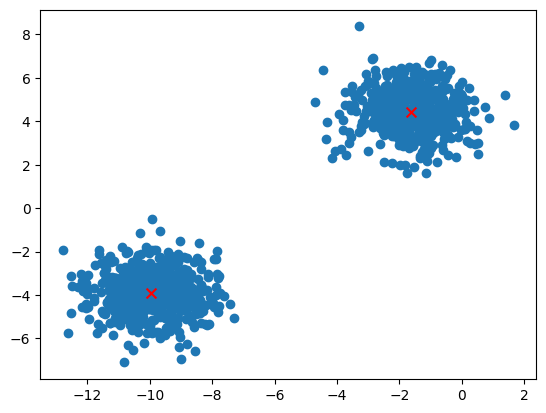


[[-2.78932997  4.00506277]
 [-4.3845723   5.68944092]]


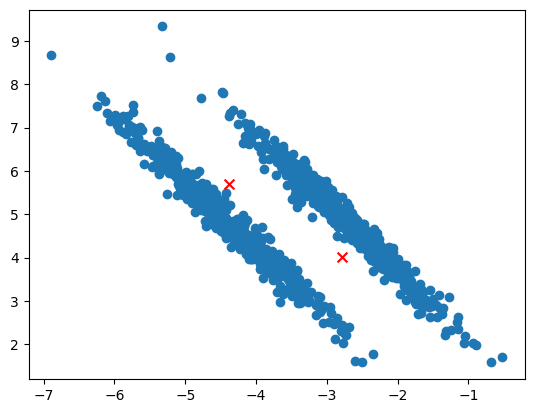


[[-0.18776666  0.5645654 ]
 [ 1.22055383 -0.07812076]]


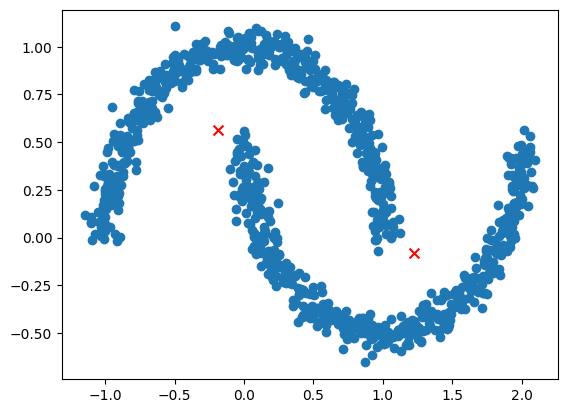

In [90]:
Xs = [X, XT, X2]
K = 2

for xs in Xs:
    mu = naive_kmeans(xs, K)
    print(mu)

    plt.scatter(xs[:, 0], xs[:, 1])
    plt.scatter(mu[:, 0], mu[:, 1], color='r', marker='x', s=50)
    plt.show()
    
    print()

## K-Means von `sklearn`

- $K:$ Anzahl Cluster
- $r \in \mathbb{N}$

```py
kmeans = KMeans(init="random", n_clusters=K, random_state=r)
kmeans.fit(X)
```

[[-1.61635019  4.43370843]
 [-9.96418821 -3.92559384]]


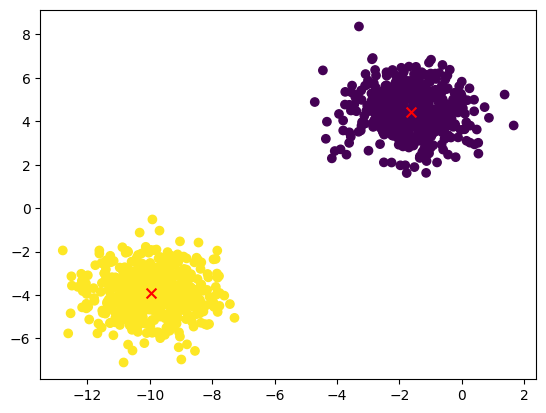

[[-2.78932997  4.00506277]
 [-4.3845723   5.68944092]]


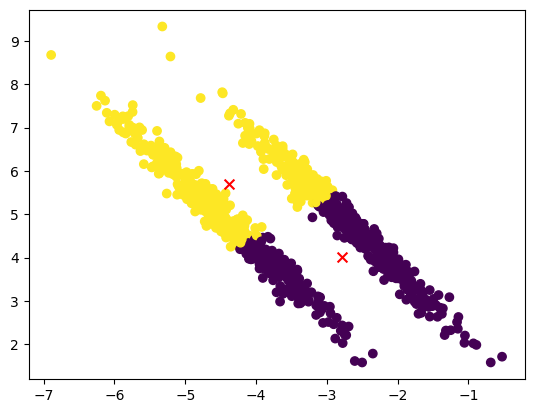

[[-0.18776666  0.5645654 ]
 [ 1.22055383 -0.07812076]]


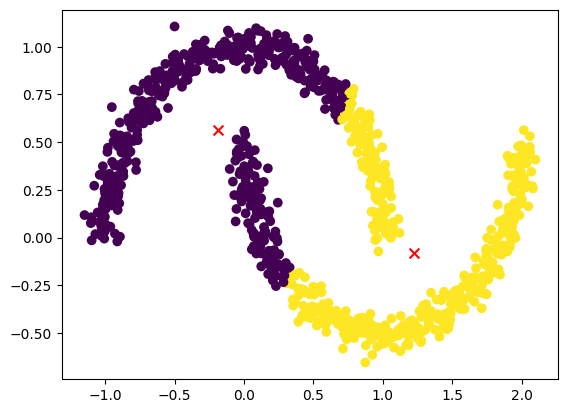

In [88]:
for xs in Xs:
    kmeans = KMeans(init='random', n_clusters=K, random_state=1)
    kmeans.fit(xs)

    center = kmeans.cluster_centers_
    print(center)

    plt.scatter(xs[:, 0], xs[:, 1], c=kmeans.labels_)
    plt.scatter(center[:, 0], center[:, 1], color='r', marker='x', s=50)
    plt.show()

## CLASSIX

***Cl**ustering by **a**ggregation with **s**orting-based **i**ndexing + **X** for explainability*

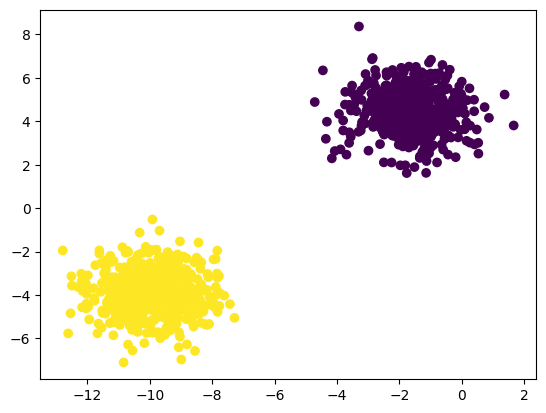

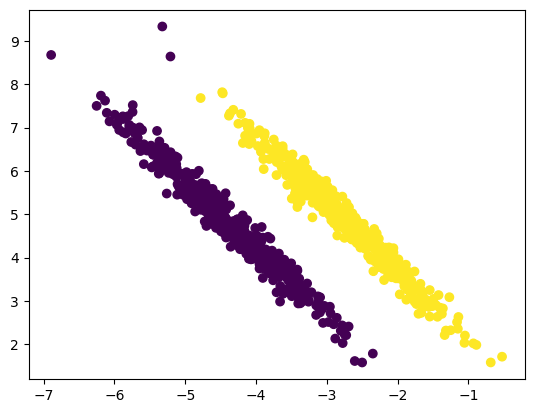

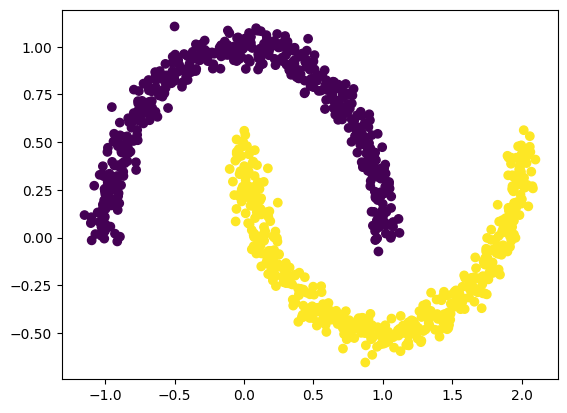

In [87]:
from classix import CLASSIX

for xs in Xs:
    clx = CLASSIX(radius=0.2, minPts=10, verbose=0)
    clx.__enable_cython__ = False

    clx.fit(xs)
    
    plt.scatter(xs[:,0], xs[:,1], c=clx.labels_)
    plt.show()